In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [16]:
wa = pd.read_csv('data/accelerometer/batterymanager/192.168.0.106:5555_2023.05.07_180723.csv')
np.asarray(wa['Timestamp'].values.tolist())

array([1683475579880, 1683475580406, 1683475580952, 1683475581492,
       1683475582021, 1683475582559, 1683475583105, 1683475583666,
       1683475584210, 1683475584750, 1683475585291, 1683475585826,
       1683475586369, 1683475586907, 1683475587449, 1683475587985,
       1683475588528, 1683475589057, 1683475589602, 1683475590138,
       1683475590679, 1683475591217, 1683475591761, 1683475592326,
       1683475592867, 1683475593411, 1683475593954, 1683475594493,
       1683475595029, 1683475595570, 1683475596113, 1683475596655,
       1683475597190, 1683475597731, 1683475598269, 1683475598807,
       1683475599340, 1683475599878, 1683475600412, 1683475600946,
       1683475601479, 1683475602019, 1683475602552, 1683475603100,
       1683475603629, 1683475604166, 1683475604708, 1683475605245,
       1683475605780, 1683475606318, 1683475606851, 1683475607391,
       1683475607931, 1683475608473, 1683475609010, 1683475609547,
       1683475610083, 1683475610620, 1683475611158, 1683475611

In [39]:
def valid_file(filename):
    if filename.startswith('logcat') and filename.endswith('.csv'):
        return True
    else:
        return False
    
def read_and_prep_df(filename):
    df = pd.read_csv(filename)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms') 
    df['Timestamp'] = df['Timestamp'] - df['Timestamp'][0]
    # convert to seconds
    df['Timestamp'] = df['Timestamp'].dt.total_seconds()
    df['power'] = (abs(df['BATTERY_PROPERTY_CURRENT_NOW'])/1000/1000) * (df['EXTRA_VOLTAGE']/1000)
    return df

def power_lineplot(df, title, X, Y):
    # plt.figure(figsize=(15, 5))
    p = sns.lineplot(x=X, y=Y, data=df)
    p.set(xlabel='Time (s)', ylabel='Power (W)', ylim=(0, 10))
    p.set_title(title)
    # plt.show()
    return p
    

cpu-high-frequency


FileNotFoundError: [Errno 2] No such file or directory: 'out/lineplots/cpu-high-frequency.pdf'

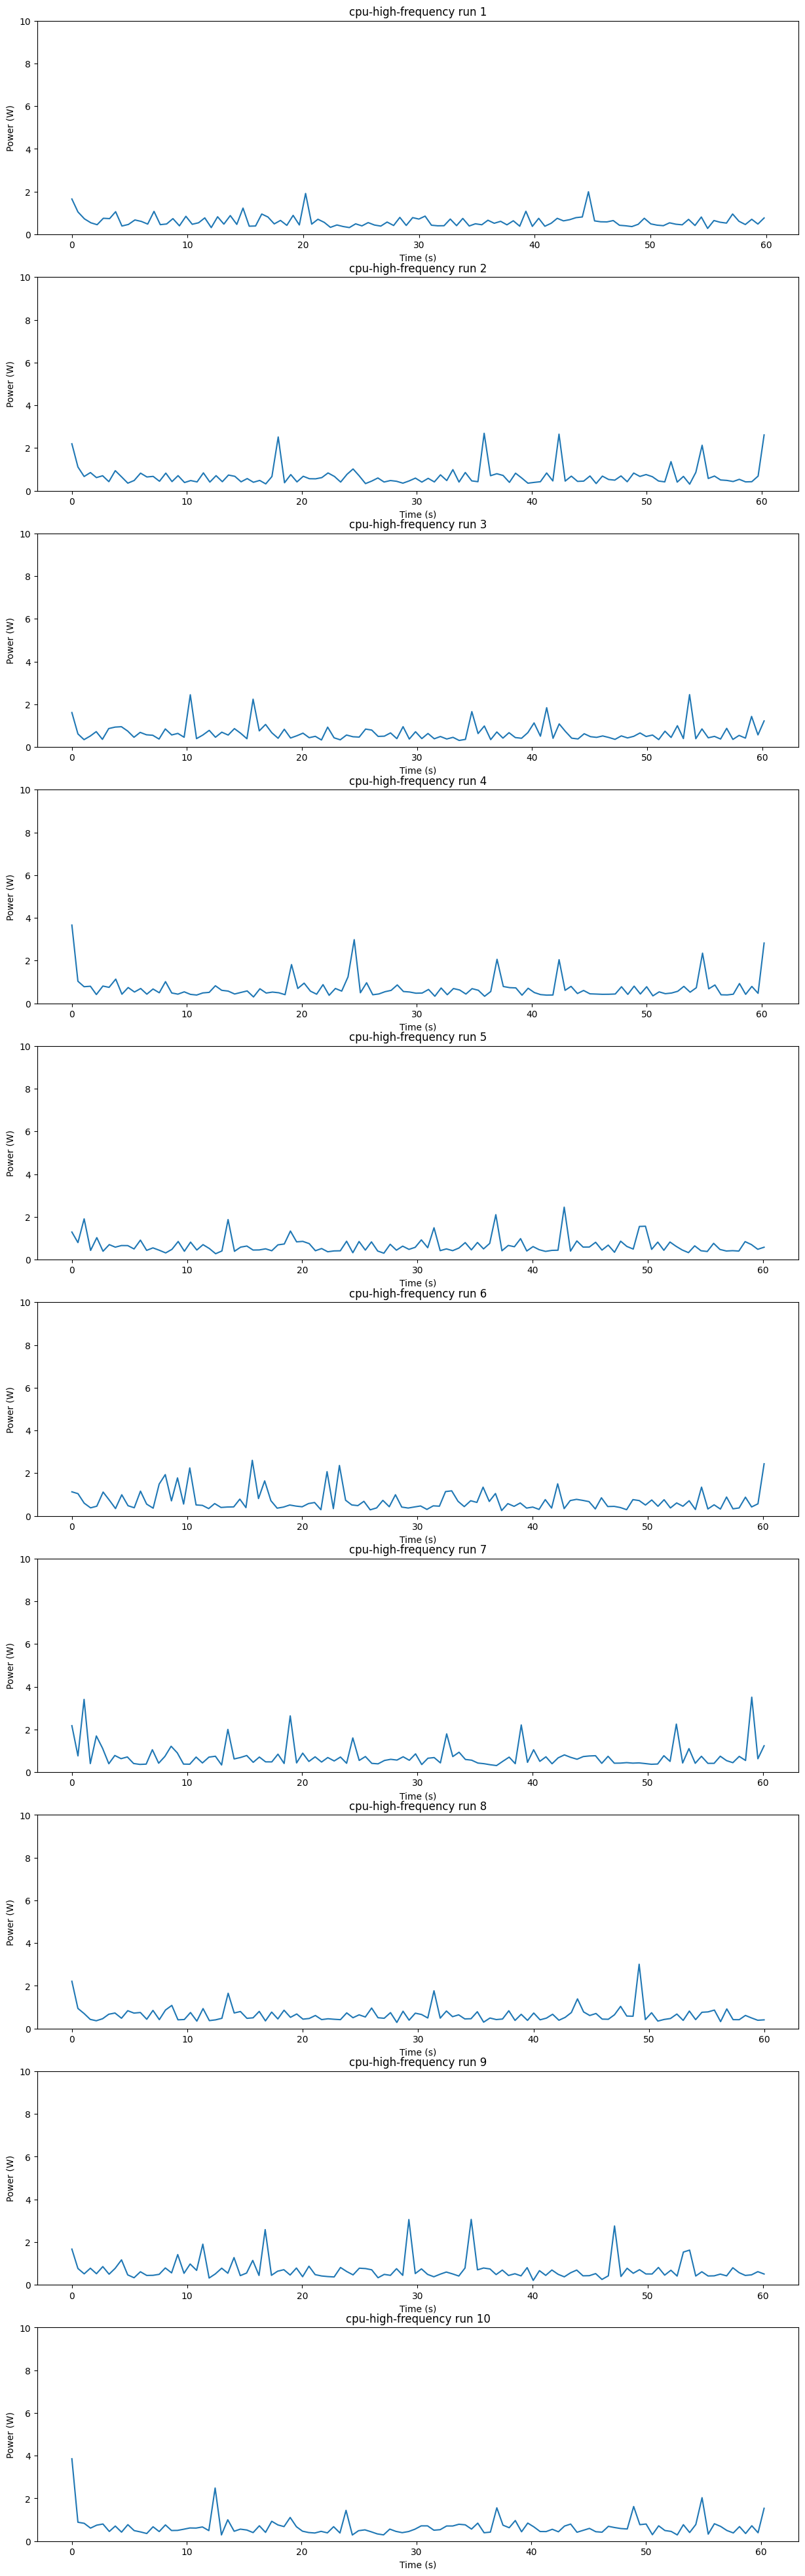

In [48]:
for folder in os.listdir('data'):
    print(folder)
    counter = 0
    fig, ax = plt.subplots(10, 1, figsize=(15, 50))
    for file in os.listdir('data/' + folder + '/batterymanager'):
        if valid_file(file):
            df = read_and_prep_df('data/' + folder + '/batterymanager/' + file)
            # power_lineplot(df, folder + ' run ' + str(counter), 'Timestamp', 'power')
            ax[counter].plot(df['Timestamp'].values, df['power'].values)
            ax[counter].set(xlabel='Time (s)', ylabel='Power (W)', ylim=(0, 10))
            ax[counter].set_title(folder + ' run ' + str(counter + 1))
            counter += 1
    plt.savefig('out/lineplots/' + folder + '.pdf', format="pdf")
    plt.show()
    # break
    
    print('\n')

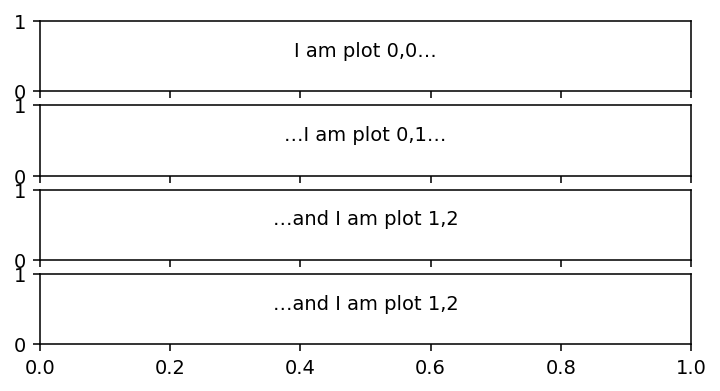

In [33]:
fig, ax = plt.subplots(4, 1, sharex='col', sharey='row', figsize = (6,3), dpi = 140)
ax[0].text(0.5, 0.5, "I am plot 0,0…", ha='center'),
ax[1].text(0.5, 0.5, "…I am plot 0,1…", ha='center'),
ax[2].text(0.5, 0.5, "…and I am plot 1,2", ha='center'),
ax[3].text(0.5, 0.5, "…and I am plot 1,2", ha='center'),
plt.show()